In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
# API setup 

In [3]:
url = "https://youtube138.p.rapidapi.com/channel/details/"
headers = {
    "x-rapidapi-key": "a41154ce4emsh22cce0bbc881c45p1090d1jsna60825697687",
    "x-rapidapi-host": "youtube138.p.rapidapi.com"
}

In [11]:
def get_channel_info(channel_url):
    querystring = {"id": channel_url, "hl": "en", "gl": "US"}
    response = requests.get(url, headers=headers, params=querystring)
    data = response.json()
    return {
        "title": data.get("title"),
        "username": data.get("username"),
        "country": data.get("country", "N/A"),
        "joinedDate": data.get("joinedDateText", "N/A"),
        "subscribers": data["stats"]["subscribers"],
        "videos": data["stats"]["videos"],
        "views": data["stats"]["views"]
    }


In [12]:
channels = [
    "https://www.youtube.com/@VNVines",
    "https://www.youtube.com/@BBKiVines",
    "https://www.youtube.com/@CarryMinati"
]

channel_data = [get_channel_info(ch) for ch in channels]


In [13]:
df = pd.DataFrame(channel_data)
display(df)

,title,username,country,joinedDate,subscribers,videos,views
0,VN Vines,@VNVines,India,"Joined Aug 18, 2020",1200000,402,315419518
1,BB Ki Vines,@BBKiVines,India,"Joined Jun 20, 2015",26600000,194,5222391812
2,CarryMinati,@CarryMinati,India,"Joined Oct 30, 2014",45100000,205,4252490615


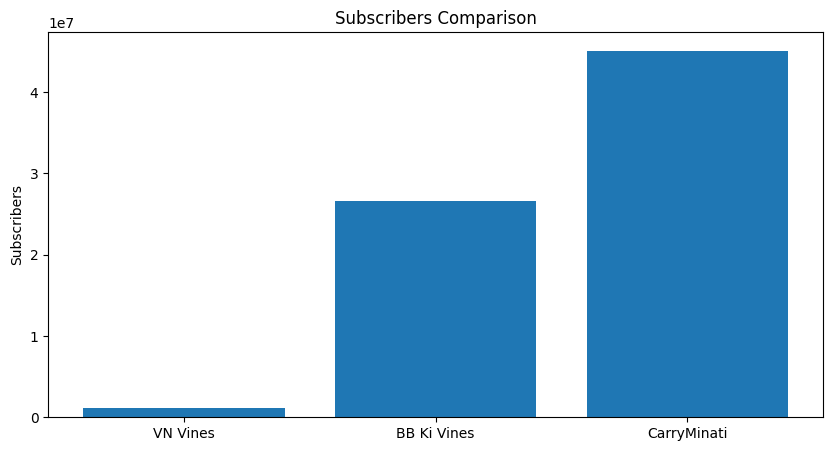

In [14]:
plt.figure(figsize=(10,5))
plt.bar(df["title"], df["subscribers"])
plt.title("Subscribers Comparison")
plt.ylabel("Subscribers")
plt.show()

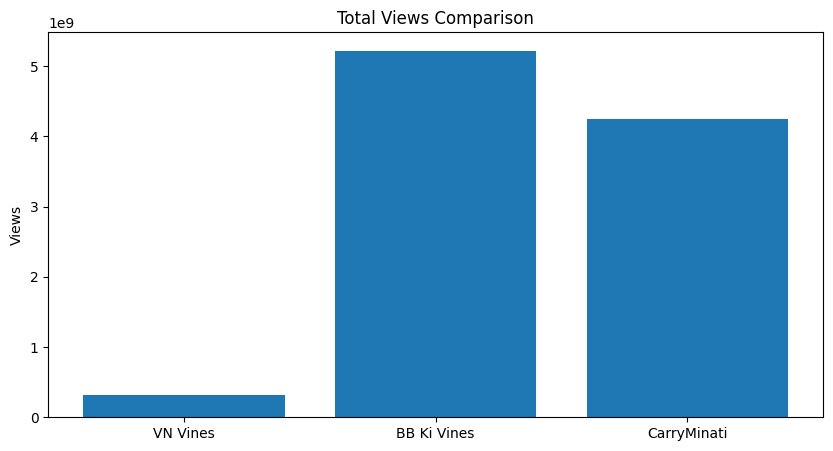

In [15]:
plt.figure(figsize=(10,5))
plt.bar(df["title"], df["views"])
plt.title("Total Views Comparison")
plt.ylabel("Views")
plt.show()

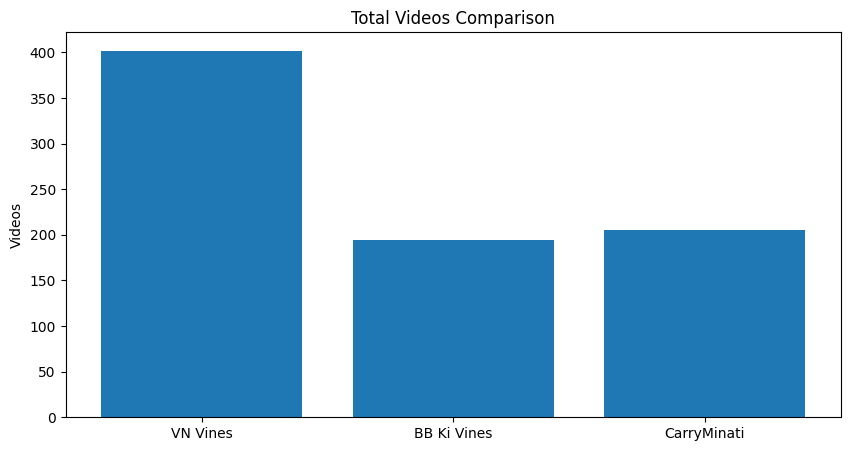

In [16]:
plt.figure(figsize=(10,5))
plt.bar(df["title"], df["videos"])
plt.title("Total Videos Comparison")
plt.ylabel("Videos")
plt.show()